In [1]:
# Scan the dataset and give the inference as:
# 1.	 List down the features and their types (e.g., numeric,    
# nominal) available in the dataset.
# 2.	 Create a histogram for each feature in the dataset to illustrate the feature distributions.
# 3.	 Create a box plot for each feature in the dataset.
# 4.	 Compare distributions and identify outliers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# 1. List down the features and their types
features_and_types = df.dtypes
print("\nFeatures and their types:")
print(features_and_types)


Features and their types:
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


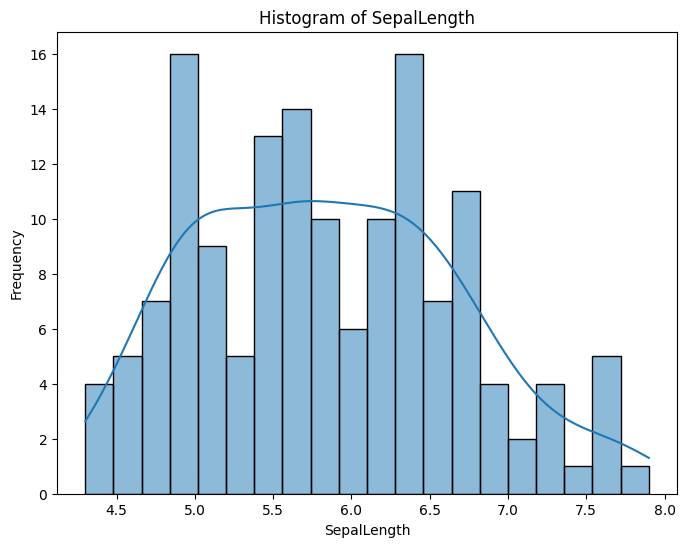

In [19]:
#histogram for each column
plt.figure(figsize=(8,6))
sns.histplot(x=df['SepalLengthCm'],bins=20,kde=True)
plt.title('Histogram of SepalLength')
plt.xlabel('SepalLength')
plt.ylabel('Frequency')
plt.show()

In [25]:
# 4. Compare distributions and identify outliers
# Exclude non-numeric columns for descriptive statistics
num_df=df.select_dtypes(include=['float64'])
print("\nDescriptive Statistics :")
print(num_df.describe())




Descriptive Statistics :
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


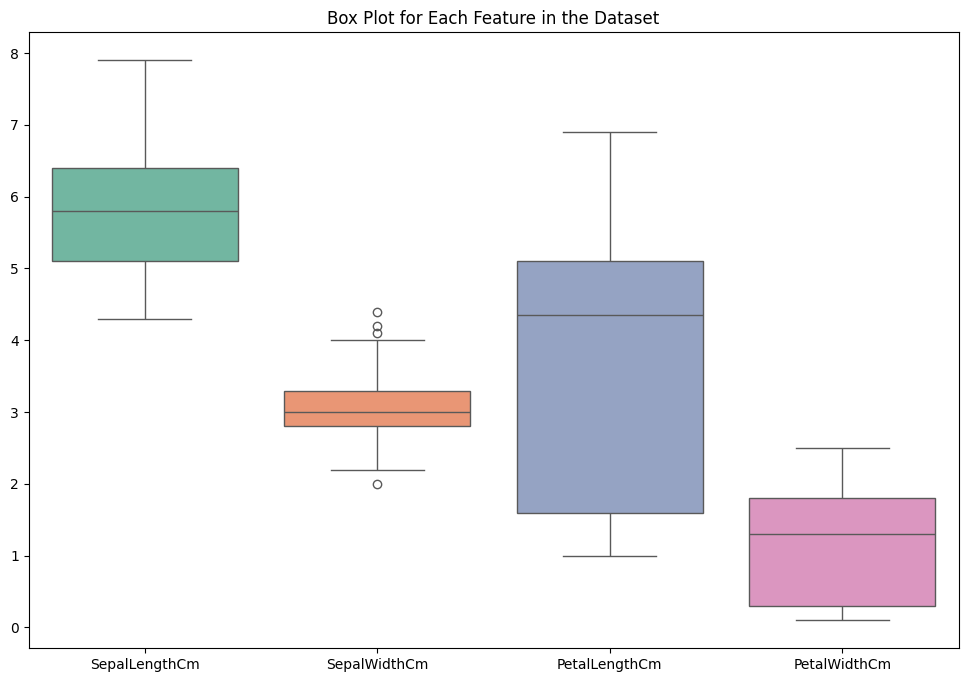

In [26]:
#box plot for each feature
plt.figure(figsize=(12,8))
data_to_plot = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
sns.boxplot(num_df,palette='Set2')
plt.title('Box Plot for Each Feature in the Dataset')
plt.show()

In [27]:
# Identify outliers using Z-scores
z_score = ((num_df-num_df.mean())/num_df.std()).abs()
outliers = z_score>2

print("\nOutliers:")
print(outliers.sum())


Outliers:
SepalLengthCm    6
SepalWidthCm     5
PetalLengthCm    0
PetalWidthCm     0
dtype: int64


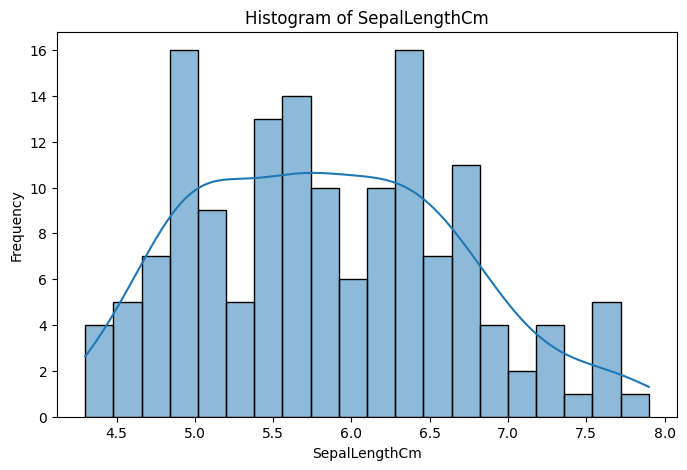

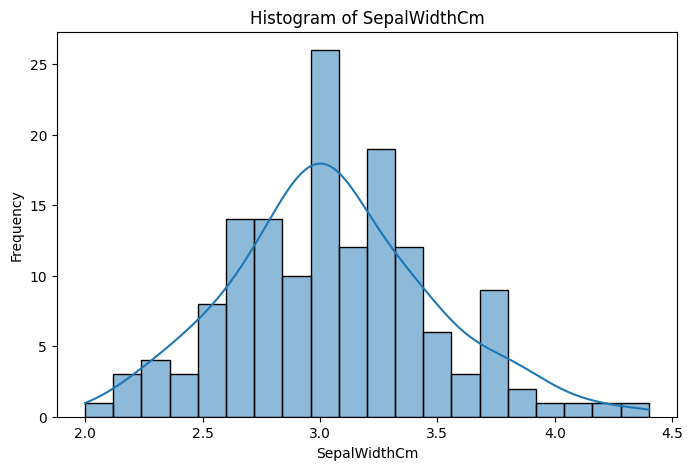

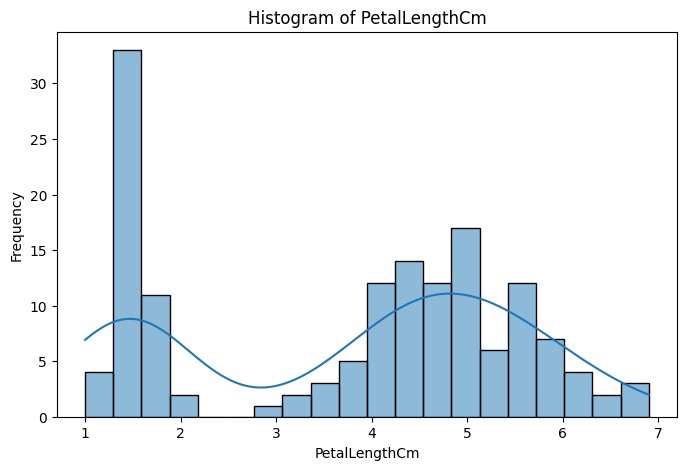

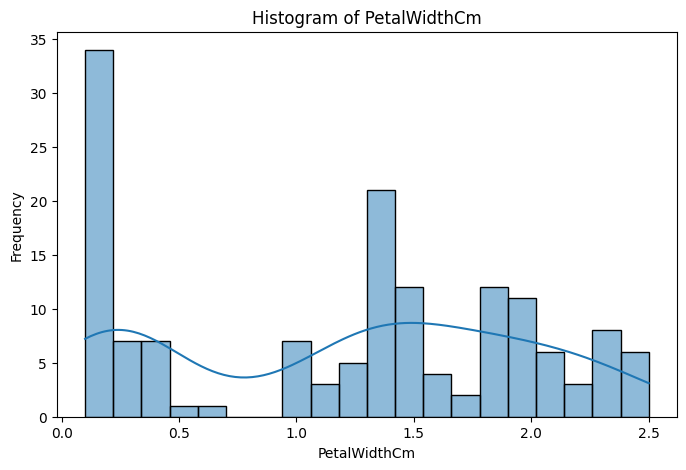

In [28]:
for feature in num_df:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=feature, bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()